# TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cifar_10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar_10.load_data()
x_train.shape, x_test.shape

170500096/170498071 [==============================] - 12s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
labels = set(y_train)
labels, len(labels)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 10)

## Base model

In [6]:
i = Input(x_train[0].shape)
x = Conv2D(32, kernel_size=5, strides=1, padding='same', activation='relu')(i)
x = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = Conv2D(128, kernel_size=5, strides=1, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(64, kernel_size=5, strides=1, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6908 - accuracy: 0.3763 - val_loss: 1.3621 - val_accuracy: 0.5028
Epoch 2/25
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3468 - accuracy: 0.5139 - val_loss: 1.2522 - val_accuracy: 0.5500
Epoch 3/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1821 - accuracy: 0.5766 - val_loss: 1.0499 - val_accuracy: 0.6394
Epoch 4/25
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0788 - accuracy: 0.6171 - val_loss: 0.9822 - val_accuracy: 0.6593
Epoch 5/25
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0105 - accuracy: 0.6441 - val_loss: 0.9657 - val_accuracy: 0.6665
Epoch 6/25
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9589 - accuracy: 0.6617 - val_loss: 0.8987 - val_accuracy: 0.6942
Epoch 7/25
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9167 - accuracy: 0.6793 - val_loss: 0.8821 -

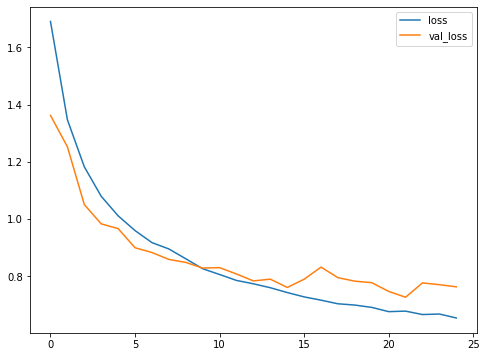

In [8]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

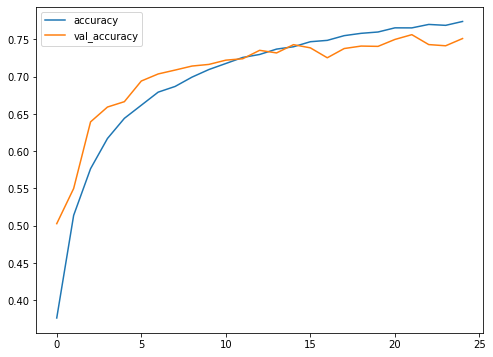

In [9]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## Batch normalization

In [10]:
i = Input(x_train[0].shape)
x = Conv2D(32, kernel_size=5, strides=1, padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=5, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(64, kernel_size=5, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6936 - accuracy: 0.4340 - val_loss: 1.2968 - val_accuracy: 0.5392
Epoch 2/25
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1825 - accuracy: 0.5841 - val_loss: 1.4648 - val_accuracy: 0.5137
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0080 - accuracy: 0.6500 - val_loss: 0.8462 - val_accuracy: 0.7018
Epoch 4/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8852 - accuracy: 0.6942 - val_loss: 0.8296 - val_accuracy: 0.7155
Epoch 5/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7988 - accuracy: 0.7225 - val_loss: 0.7948 - val_accuracy: 0.7314
Epoch 6/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7277 - accuracy: 0.7480 - val_loss: 0.6692 - val_accuracy: 0.7730
Epoch 7/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6566 - accuracy: 0.7721 - val_loss: 0.7452 -

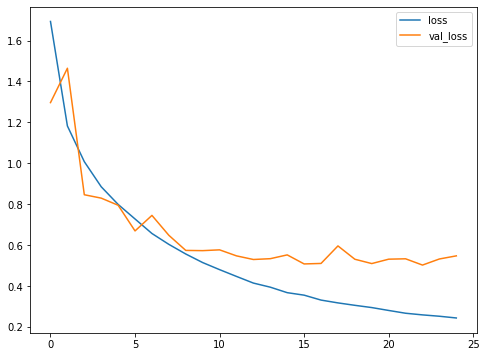

In [12]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

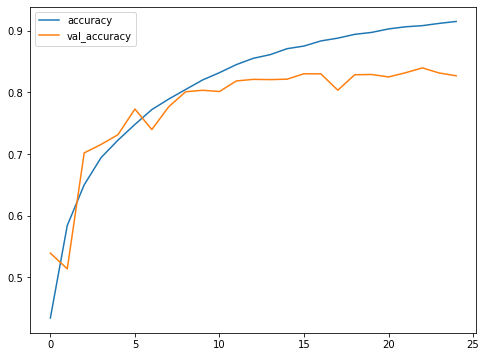

In [13]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Data Augumentation

In [14]:
i = Input(x_train[0].shape)
x = Conv2D(32, kernel_size=5, strides=1, padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=5, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(64, kernel_size=5, strides=1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [16]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
train_generator = data_generator.flow(x_train, y_train, batch_size)
num_batches = x_train.shape[0] // batch_size

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=num_batches, epochs=25)

Epoch 1/25
1562/1562 [==============================] - 30s 19ms/step - loss: 1.8193 - accuracy: 0.3805 - val_loss: 1.5100 - val_accuracy: 0.4462
Epoch 2/25
1562/1562 [==============================] - 30s 19ms/step - loss: 1.3532 - accuracy: 0.5151 - val_loss: 1.3473 - val_accuracy: 0.5310
Epoch 3/25
1562/1562 [==============================] - 30s 19ms/step - loss: 1.1637 - accuracy: 0.5939 - val_loss: 0.9884 - val_accuracy: 0.6661
Epoch 4/25
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0316 - accuracy: 0.6382 - val_loss: 1.0012 - val_accuracy: 0.6306
Epoch 5/25
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9391 - accuracy: 0.6724 - val_loss: 0.7567 - val_accuracy: 0.7452
Epoch 6/25
1562/1562 [==============================] - 30s 19ms/step - loss: 0.8491 - accuracy: 0.7051 - val_loss: 0.7664 - val_accuracy: 0.7348
Epoch 7/25
1562/1562 [==============================] - 30s 19ms/step - loss: 0.7884 - accuracy: 0.7237 - val_loss: 0.8883 -

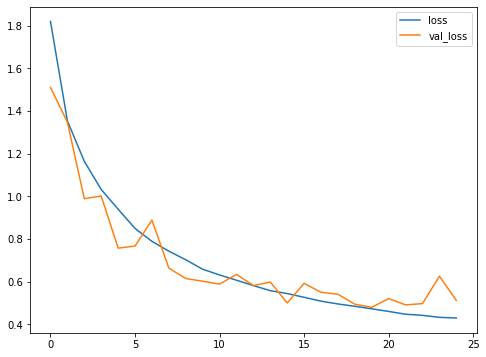

In [17]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

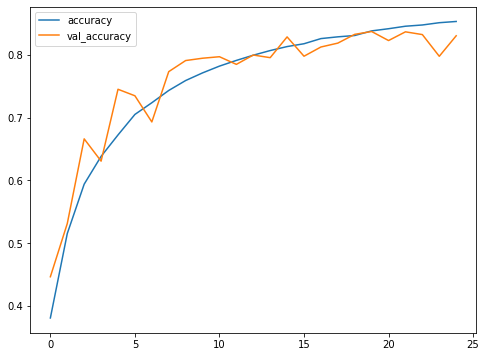

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()